In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.corr(numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


## Data analysis

### Distribution of Annual Income

C:\Users\vikas\AppData\Local\Temp\ipykernel_24016\3440498415.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual Income (k$)'], bins=30, color='blue')


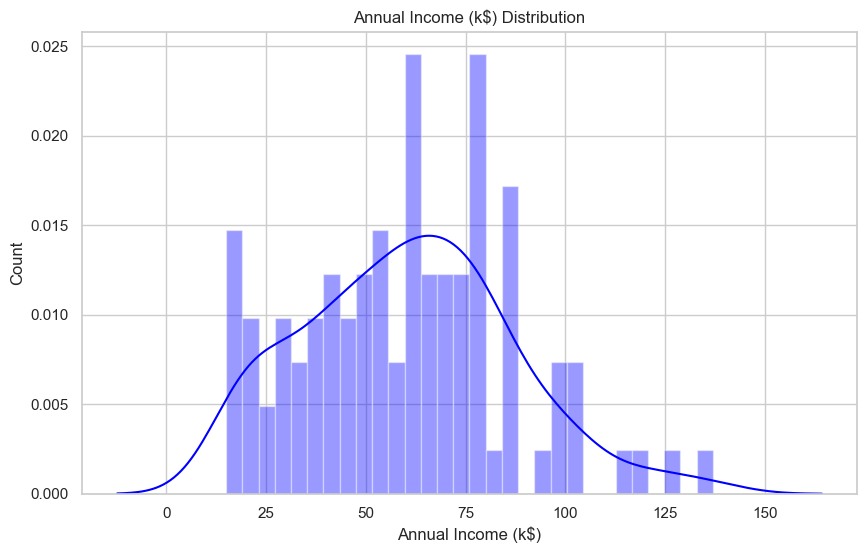

In [17]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.distplot(df['Annual Income (k$)'], bins=30, color='blue')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.title('Annual Income (k$) Distribution')
plt.show()

### Distribution of Age

C:\Users\vikas\AppData\Local\Temp\ipykernel_24016\750322546.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], kde=False, bins=10, color='red')


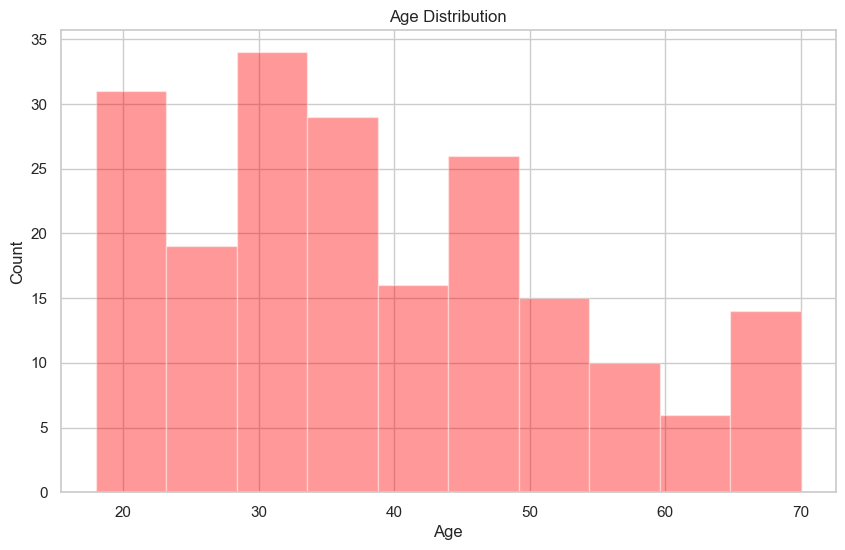

In [18]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.distplot(df['Age'], kde=False, bins=10, color='red')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

### Distribution of spending score

C:\Users\vikas\AppData\Local\Temp\ipykernel_24016\1637511060.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Spending Score (1-100)'],kde=False ,bins=30, color='green')


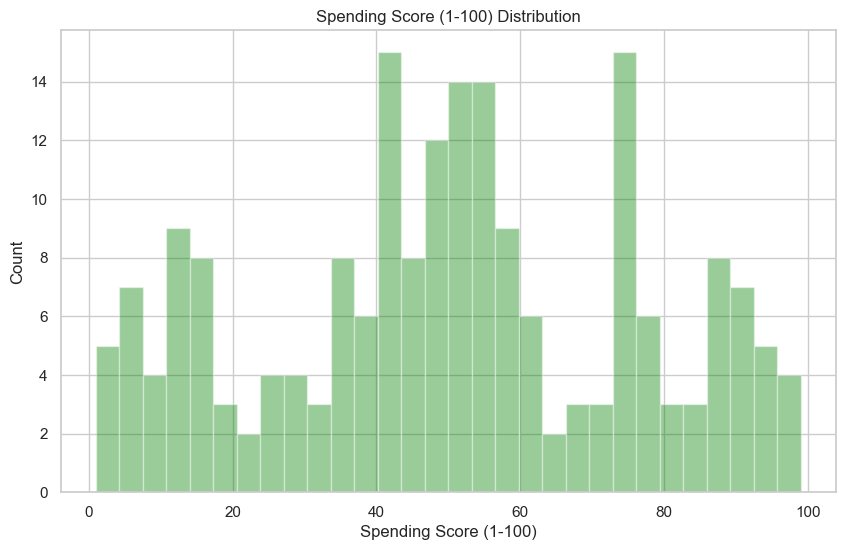

In [20]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.distplot(df['Spending Score (1-100)'],kde=False ,bins=30, color='green')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.title('Spending Score (1-100) Distribution')
plt.show()

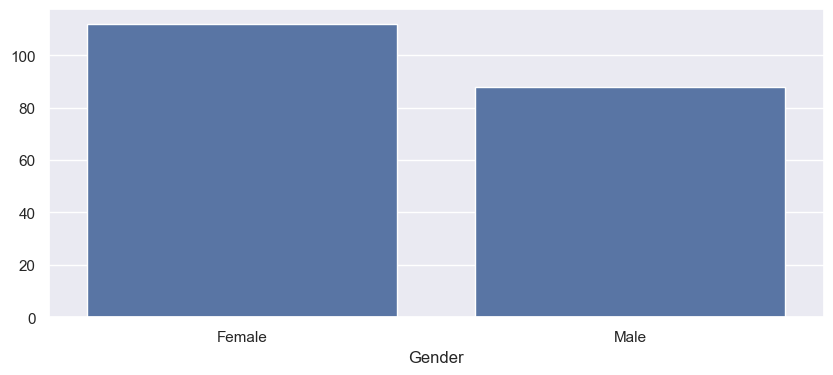

In [16]:
gender = df.Gender.value_counts()
sns.set(style="darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=gender.index,y=gender.values)
plt.show()

In [21]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [22]:
df = df[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [23]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


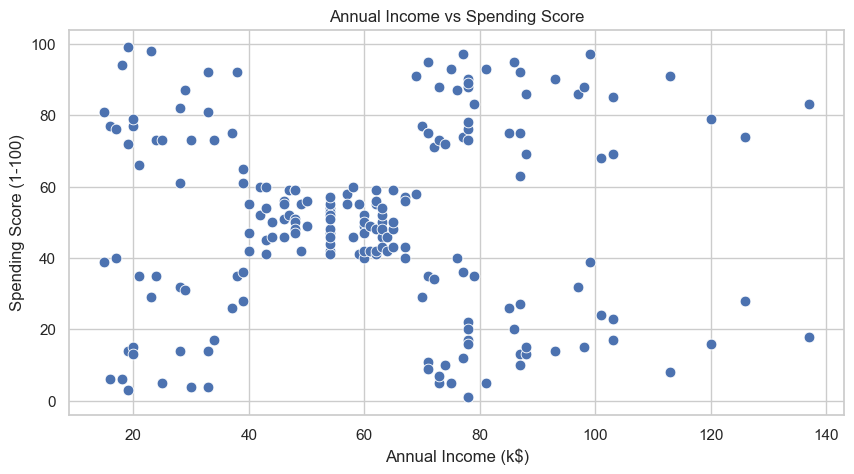

In [24]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=X,s=60)
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [25]:
from sklearn.cluster import KMeans


In [26]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

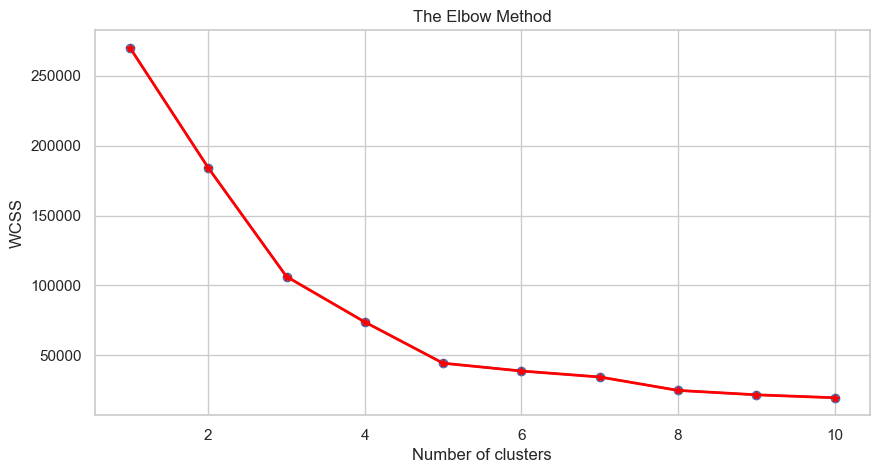

In [30]:
plt.figure(figsize=(10,5))  
plt.plot(range(1,11), wcss, marker='o')
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker='*')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

In [31]:
km1 = KMeans(n_clusters=5)
km1.fit(X)
y = km1.fit_predict(X)
df["label"] = y
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4


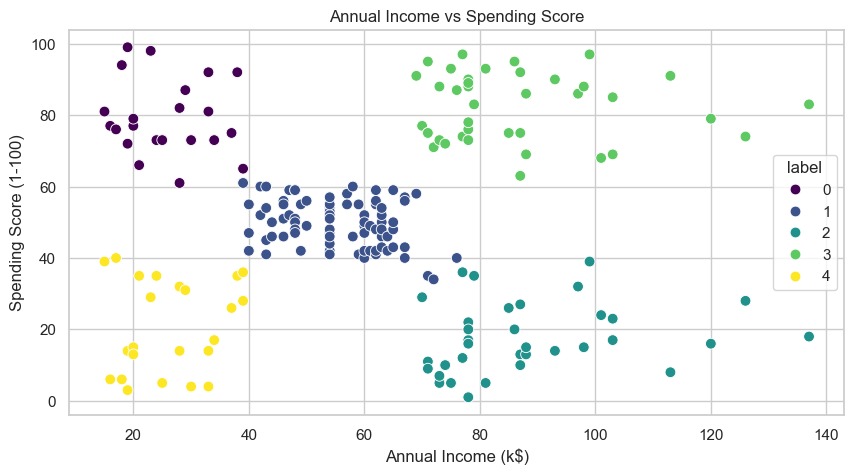

In [32]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df,hue='label',palette='viridis',s=60,legend='full')
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [34]:
df['label'].value_counts()

label
1    81
3    39
2    35
4    23
0    22
Name: count, dtype: int64

In [36]:
cust1 = df[df["label"]==0]
print("Number of customers in Cluster 1: ",len(cust1))
print("They are -", cust1["CustomerID"].values)
print("------------------------------------------------")
cust2 = df[df["label"]==1]
print("Number of customers in Cluster 2: ",len(cust2))
print("They are -", cust2["CustomerID"].values)
print("------------------------------------------------")
cust3 = df[df["label"]==2]
print("Number of customers in Cluster 3: ",len(cust3))
print("They are -", cust3["CustomerID"].values)
print("------------------------------------------------")
cust4 = df[df["label"]==3]
print("Number of customers in Cluster 4: ",len(cust4))
print("They are -", cust4["CustomerID"].values)
print("------------------------------------------------")
cust5 = df[df["label"]==4]
print("Number of customers in Cluster 5: ",len(cust5))
print("They are -", cust5["CustomerID"].values)
print("------------------------------------------------")

Number of customers in Cluster 1:  22
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
------------------------------------------------
Number of customers in Cluster 2:  81
They are - [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 133 143]
------------------------------------------------
Number of customers in Cluster 3:  35
They are - [125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
------------------------------------------------
Number of customers in Cluster 4:  39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 18

In [37]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'label'],
      dtype='object')

## **Clusteering on the basis of 3D Data**

In [38]:
df2 = df[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [40]:
X2 = df2[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]

In [41]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++')
    km.fit(X2)
    wcss.append(km.inertia_)

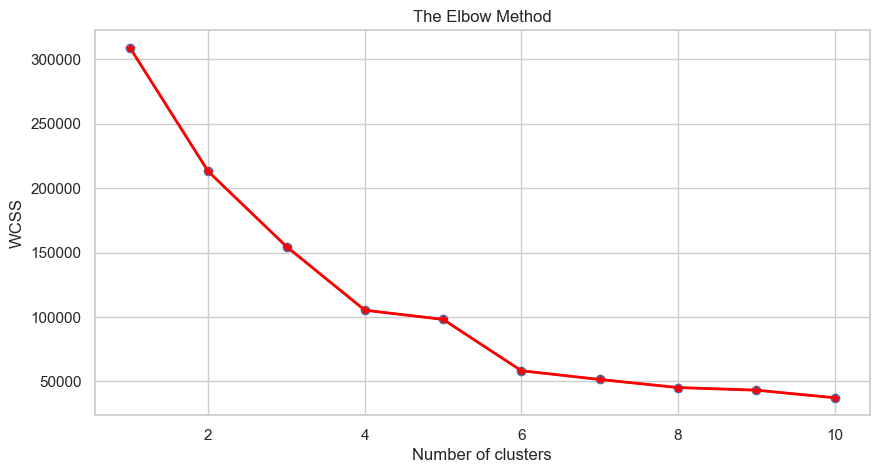

In [42]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss, marker='o')
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker='*')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

In [43]:
km2 = KMeans(n_clusters=6)
km2.fit(X2)
y2 = km2.fit_predict(X2)
df2["label"] = y2
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,0
1,2,Male,21,15,81,5
2,3,Female,20,16,6,0
3,4,Female,23,16,77,5
4,5,Female,31,17,40,0


In [44]:
from mpl_toolkits.mplot3d import Axes3D

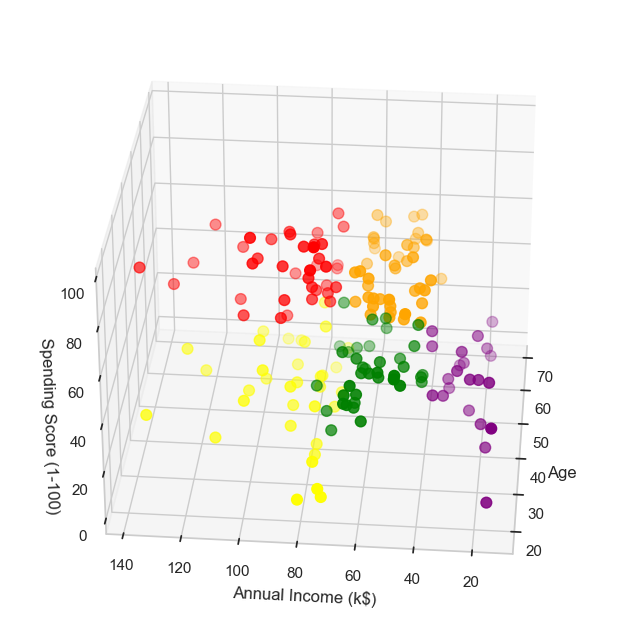

In [46]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2.Age[df2.label == 0],df2['Annual Income (k$)'][df2.label == 0],df2['Spending Score (1-100)'][df2.label == 0],c='purple',s=60)
ax.scatter(df2.Age[df2.label == 1],df2['Annual Income (k$)'][df2.label == 1],df2['Spending Score (1-100)'][df2.label == 1],c='red',s=60)
ax.scatter(df2.Age[df2.label == 2],df2['Annual Income (k$)'][df2.label == 2],df2['Spending Score (1-100)'][df2.label == 2],c='orange',s=60)
ax.scatter(df2.Age[df2.label == 3],df2['Annual Income (k$)'][df2.label == 3],df2['Spending Score (1-100)'][df2.label == 3],c='green',s=60)
ax.scatter(df2.Age[df2.label == 4],df2['Annual Income (k$)'][df2.label == 4],df2['Spending Score (1-100)'][df2.label == 4],c='yellow',s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [47]:
cust1 = df2[df2["label"]==0]
print("Number of customers in Cluster 1: ",len(cust1))
print("They are -", cust1["CustomerID"].values)
print("------------------------------------------------")
cust2 = df2[df2["label"]==1]
print("Number of customers in Cluster 2: ",len(cust2))
print("They are -", cust2["CustomerID"].values)
print("------------------------------------------------")
cust3 = df2[df2["label"]==2]
print("Number of customers in Cluster 3: ",len(cust3))
print("They are -", cust3["CustomerID"].values)
print("------------------------------------------------")
cust4 = df2[df2["label"]==3]
print("Number of customers in Cluster 4: ",len(cust4))
print("They are -", cust4["CustomerID"].values)
print("------------------------------------------------")
cust5 = df2[df2["label"]==4]
print("Number of customers in Cluster 5: ",len(cust5))
print("They are -", cust5["CustomerID"].values)
print("------------------------------------------------")

Number of customers in Cluster 1:  22
They are - [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 43 45]
------------------------------------------------
Number of customers in Cluster 2:  39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
------------------------------------------------
Number of customers in Cluster 3:  44
They are - [ 41  47  51  54  55  56  57  58  60  61  63  64  65  67  68  71  72  73
  74  75  77  80  81  83  84  86  87  90  91  93  97  99 102 103 105 107
 108 109 110 111 117 118 119 120]
------------------------------------------------
Number of customers in Cluster 4:  38
They are - [ 48  49  50  52  53  59  62  66  69  70  76  78  79  82  85  88  89  92
  94  95  96  98 100 101 104 106 112 113 114 115 116 121 122 123 125 127
 133 143]
------------------------------------------------
Number of customers in Cluster 5:  34
They a

In [48]:
print("The End")

The End
